# MNIST vs MLP

#### Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DL_Practical_MLP')

In [ ]:
from IPython.display import Image, display
#display(Image(filename='/content/drive/My Drive/DL_2019_20/Files/1a.png', embed=True))

In [ ]:
#%tensorflow_version 1.0

#### Imports

In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Fetching and Visualizattion

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data() #load data
xtest1 = np.copy(xtrain)
ytest1 = np.copy(ytest)
print(len(xtrain),len(xtest))

60000 10000


In [ ]:
print(ytest1[100])
print((xtest[1]))
#print(plt.imshow(xtest[0]))

6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 

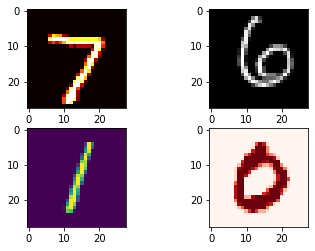

In [ ]:
plt.subplot(221).imshow(xtest[0],cmap='hot')
plt.subplot(222).imshow(xtest[100],cmap='gray')
plt.subplot(223).imshow(xtest[2],cmap='viridis')
plt.subplot(224).imshow(xtest[3],cmap='Reds')

In [ ]:
print(ytest[0])
print(ytest[1])
print(ytest[2])
print(ytest[3])

7
2
1
0


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(type(xtrain))
print(xtrain.ndim)
print(xtrain.dtype)

<class 'numpy.ndarray'>
3
uint8


In [ ]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])
print(ytrain.shape[0])

60000
28
28
60000


#### Data Pre Processing
* Normalization
* One Hot Encoding

In [ ]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [ ]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [ ]:
print(xtrain[0])

[[-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42]
 [-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42]
 [-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42]
 [-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42]
 [-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.42 -0.42 -0.42 -0.42]
 [-0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42 -0.42
  -0.39 -0.19 -0.19 -0.19  1.18  1.31  1.8  -0.09  

In [ ]:
print(xtrain.shape)
print(type(xtrain[1]))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [ ]:
print("shape of xtrain before="+str(xtrain.shape))
xtrain = xtrain.reshape(xtrain.shape[0],784)
xtest  = xtest.reshape(xtest.shape[0],784)
print(xtrain.shape)
print(xtest.shape)

shape of xtrain before=(60000, 28, 28)
(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


binary form

In [ ]:

i=1
print(ytrain[i])
print(np.argmax(ytrain[i])) #Returns the indices of the maximum values along an axis.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


In [ ]:
import numpy as np
a=np.array([10,20,30,40,85,63])


#### MLP Model
* Model building
* Compiling
* Training

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10,input_shape = (784,), activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


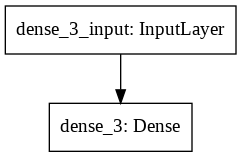

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/DL_Practical_MLP/Results')
print(os.getcwd())
from keras.callbacks import EarlyStopping,ModelCheckpoint
mc = ModelCheckpoint('MLP_Mnist_MLP.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
filepath = "saved-model-{epoch:02d}.h5"
mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)
cv = keras.callbacks.CSVLogger('MLP_Mnist_MLP.csv', separator=',', append=False)
#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=75,  mode='auto')

/content/drive/My Drive/Colab Notebooks/DL_Practical_MLP/Results


In [ ]:
!pip install keras.optimizers


ERROR: Could not find a version that satisfies the requirement keras.optimizers (from versions: none)
ERROR: No matching distribution found for keras.optimizers


In [ ]:
from keras.losses import mean_squared_error,mean_absolute_error,mean_squared_logarithmic_error,categorical_hinge,hinge,squared_hinge,categorical_crossentropy
from keras import optimizers
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy'])

In [ ]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Digit : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(28,28),cmap="viridis")
weight = WeightCallback()

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1000 - accuracy: 0.1631 - val_loss: 0.0868 - val_accuracy: 0.2669

Epoch 00001: val_loss did not improve from 0.02439
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.2836 - val_loss: 0.0765 - val_accuracy: 0.3703

Epoch 00002: val_loss did not improve from 0.02439
Epoch 3/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.3804 - val_loss: 0.0672 - val_accuracy: 0.4643

Epoch 00003: val_loss did not improve from 0.02439
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.4786 - val_loss: 0.0583 - val_accuracy: 0.5775

Epoch 00004: val_loss did not improve from 0.02439
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.5808 - val_loss: 0.0512 - val_accuracy: 0.6483

Epoch 00005: val_loss did not improve from 0.02439
Epoch 6/20
188/188 [==========

[0.023746944963932037, 0.8511000275611877]

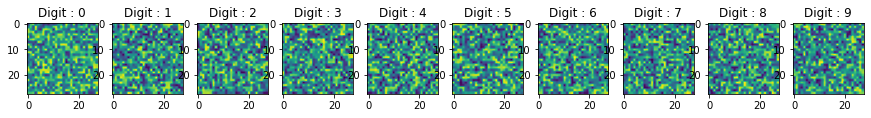

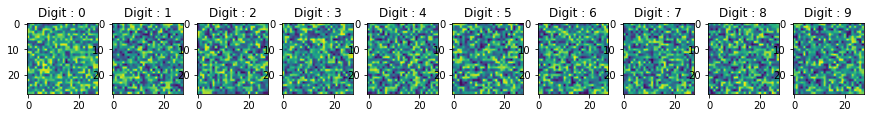

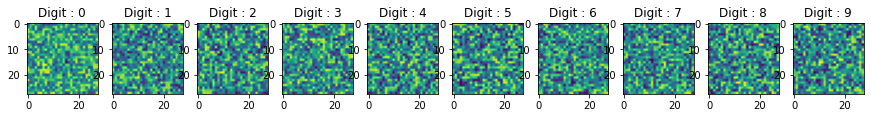

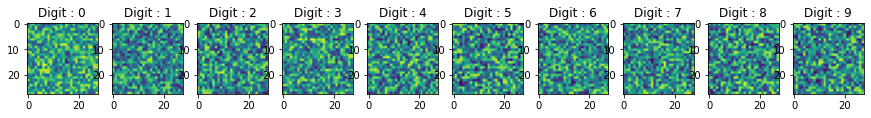

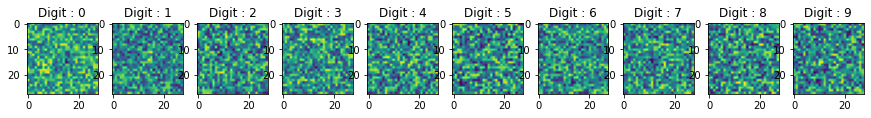

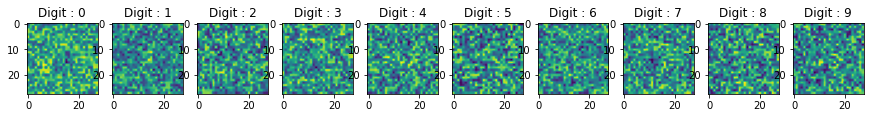

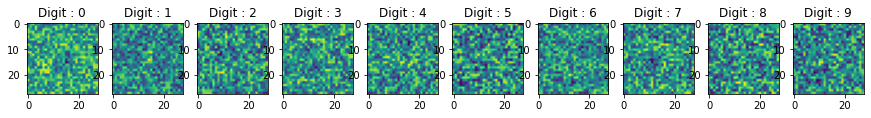

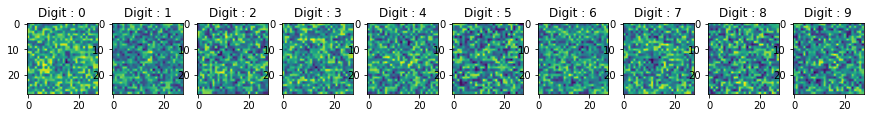

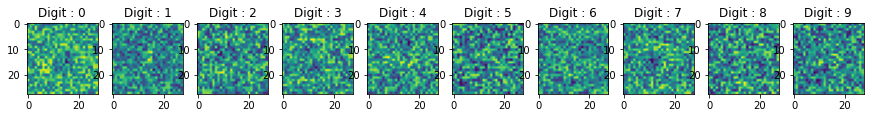

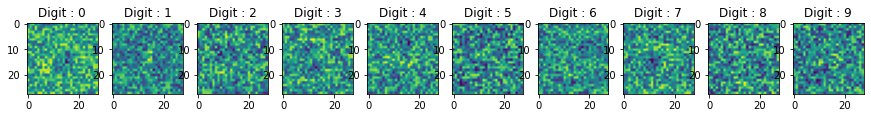

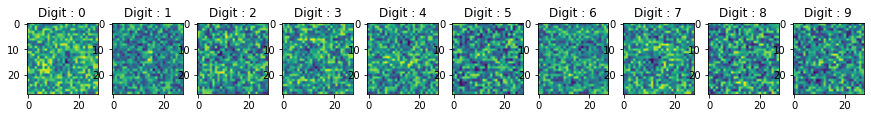

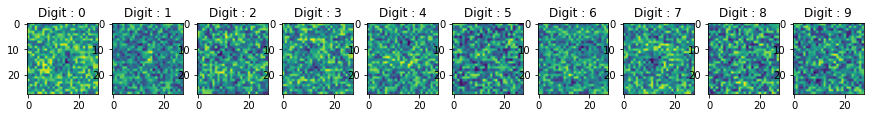

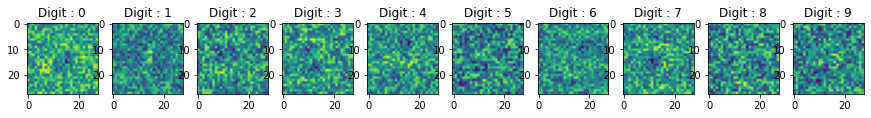

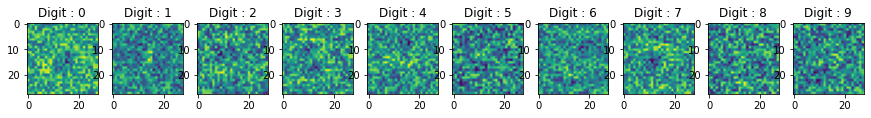

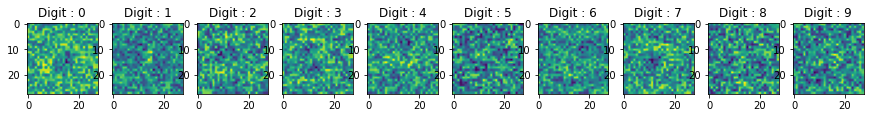

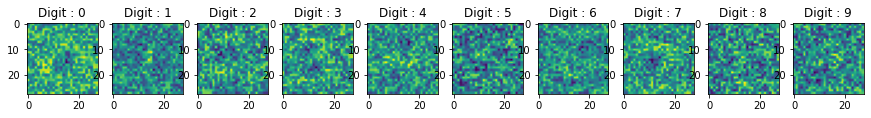

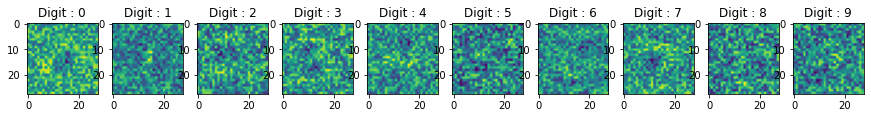

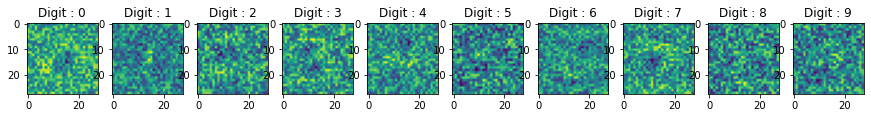

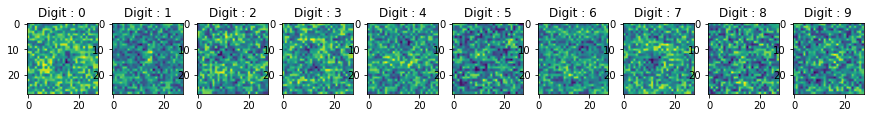

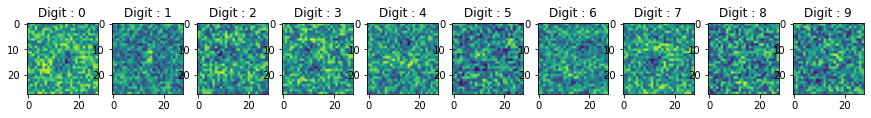

In [ ]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [weight,mc,mc1,cv],epochs=20, verbose=1)
model.evaluate(xtest,ytest)

#### Performance Evaluation
* Loss and Accuracy Plots
* Evaluate
* Prediction
* Confusion Matrix

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

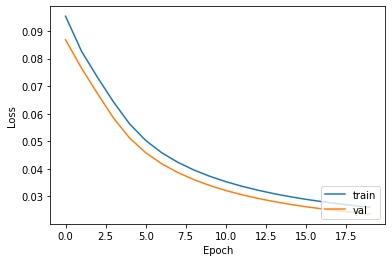

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

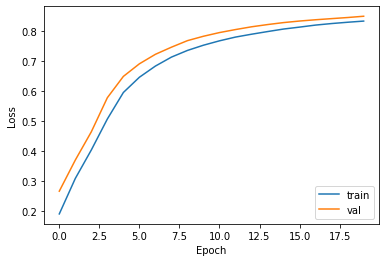

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

In [ ]:
#model.save_weights('')
model.load_weights('MLP_Mnist_MLP.h5')
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 927us/step - loss: 0.0237 - accuracy: 0.8511


[0.023746944963932037, 0.8511000275611877]

In [ ]:
i=7
print("Actual is",ytest[i])
pred=model.predict(xtest[i].reshape(1,784))
#print(pred)
print(pred.argmax())

Actual is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.95      0.92       980
     class 1       0.91      0.96      0.93      1135
     class 2       0.87      0.83      0.85      1032
     class 3       0.84      0.82      0.83      1010
     class 4       0.85      0.83      0.84       982
     class 5       0.81      0.70      0.75       892
     class 6       0.85      0.91      0.88       958
     class 7       0.87      0.87      0.87      1028
     class 8       0.79      0.80      0.80       974
     class 9       0.80      0.81      0.80      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 927    0    8    8    1    7   16    1   11    1]
 [   0 1091    4    7    2    2    4    1   24    0]
 [  16   17  861   15   18    1   32   18   44   10]
 [  11    6   24  833    3   55   10   19   31   18]
 [   4   11   10    2  818   10   36    4    4   83]
 [  30   19    7   66   18  620   32   19   55   26]
 [  20    9   12    1   14   17  867    5   12    1]
 [   2   26   29    9   14    2    3  898    7   38]
 [  14   17   21   39   16   32   14   13  778   30]
 [  16    8   11   10   57   17    6   51   15  818]]


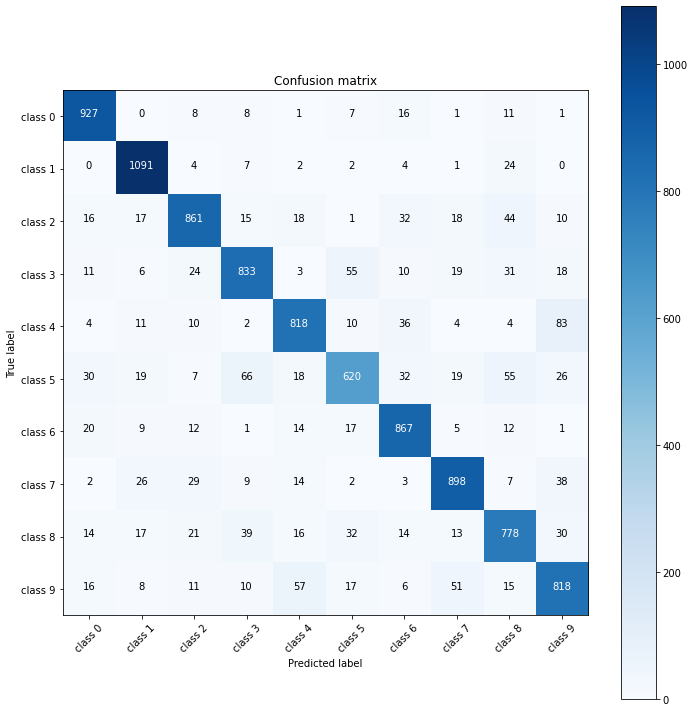

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')